Input image:

In [35]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

input_image = Image.open("../input_images/a4.tif")
image_array = np.array(input_image)
height, width = image_array.shape

print(image_array)
print(f"Shape: {image_array.shape}")  #(height, width)

[[210 218 218 ... 129 133 129]
 [206 218 222 ... 129 133 137]
 [202 206 210 ... 125 133 137]
 ...
 [202 178 178 ... 145 141 157]
 [186 194 178 ... 149 141 149]
 [178 182 186 ... 145 137 145]]
Shape: (400, 400)


Histogram Algorithm:

In [36]:
def apply_histogram(image_array):
    height, width = image_array.shape
    histogram_array = np.zeros(256, dtype=int)
    for row in range(height):
        for column in range(width):
            pixel_value = image_array[row,column]
            histogram_array[pixel_value]+=1
    return histogram_array

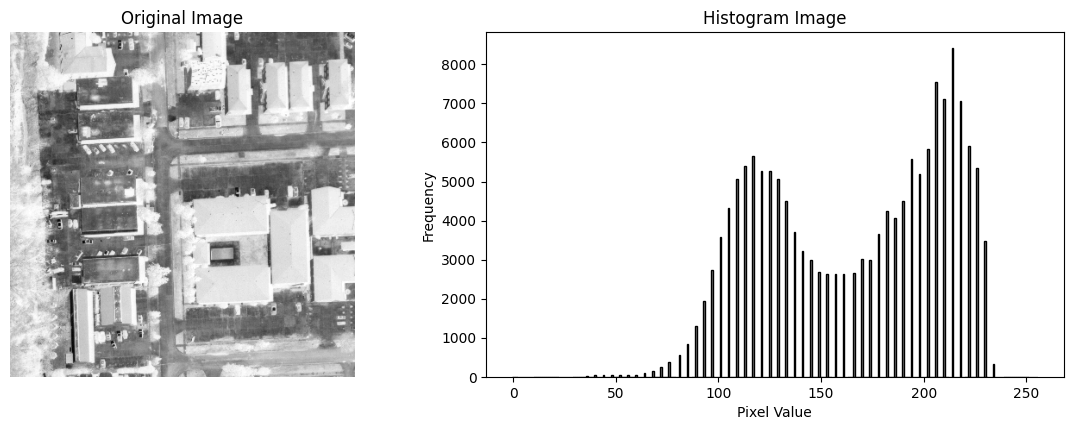

In [37]:
histogram_array = apply_histogram(image_array)

plt.figure(figsize=(12, 8))
# input image
plt.subplot(2, 2, 1)
plt.imshow(image_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")
# output histogram
plt.subplot(2, 2, 2)
plt.bar(range(256),histogram_array, color="gray", edgecolor="black")
plt.title("Histogram Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../output_images/histogram_result.png", dpi=300, bbox_inches='tight')
plt.show()

Histogram Equalization Algorithm:

In [38]:
def apply_smoothed_histogram(image_array):
    smoothed_histogram_array =  np.zeros(256, dtype=int)
    histogram_array = apply_histogram(image_array)
    smoothed_histogram_array[0] = (histogram_array[0]+histogram_array[1])/2
    smoothed_histogram_array[255] = (histogram_array[255]+histogram_array[254])/2
    for gray_level in range(1,255):
        smoothed_histogram_array[gray_level] = (histogram_array[gray_level]+histogram_array[gray_level+1]+histogram_array[gray_level-1])/3
    return smoothed_histogram_array

def apply_Equalized_histogram(image_array):
    sum = 0
    sum_of_histogram = np.zeros(256, dtype=int)
    height, width = image_array.shape
    area = height * width
    smoothed_histogram_array = apply_smoothed_histogram(image_array)
    for gray_level in range(256):
        sum += smoothed_histogram_array[gray_level]
        sum_of_histogram[gray_level] = sum
    for row in range(height):
        for column in range(width):
            pixel_value = image_array[row,column]
            image_array[row,column] = (256/area) * sum_of_histogram[pixel_value]


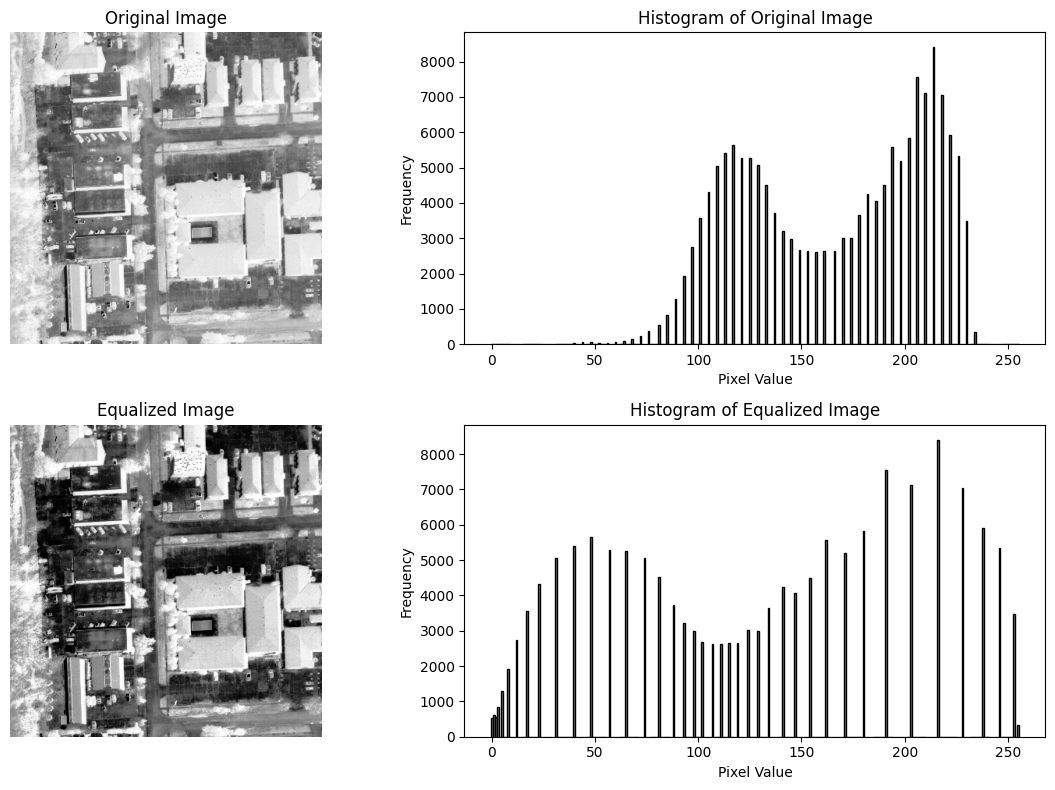

In [39]:
apply_Equalized_histogram(image_array)

Image.fromarray(image_array).save("equalized_histogram.tif")

equalized_histogram_array = apply_histogram(image_array)

# Plot the results
plt.figure(figsize=(12, 8))
# Original image
plt.subplot(2, 2, 1)
plt.imshow(np.array(input_image), cmap="gray")
plt.title("Original Image")
plt.axis("off")
# Original histogram
plt.subplot(2, 2, 2)
plt.bar(range(256), histogram_array, color="gray", edgecolor="black")
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
# Equalized image
plt.subplot(2, 2, 3)
plt.imshow(image_array, cmap="gray")
plt.title("Equalized Image")
plt.axis("off")
# Equalized histogram
plt.subplot(2, 2, 4)
plt.bar(range(256),equalized_histogram_array, color="gray", edgecolor="black")
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../output_images/equalized_histogram_result.png", dpi=300, bbox_inches='tight')
plt.show()